# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.formula.api as smf

%matplotlib inline

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,flag_doente
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1,1


1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [21]:
'''
Número de saudáveis
Número de doentes
Total'''

tab = pd.crosstab(df['sex'], df['flag_doente'], margins=True)
tab

flag_doente,0,1,All
sex,,,
0.0,72,25,97
1.0,92,114,206
All,164,139,303


In [22]:
#odds
tab['Chance'] = tab[1]/tab[0]

#media de doentes
tab['media_doentes'] = tab[1]/tab['All']

#odds ratio
tab['odds_ratio'] = tab['Chance']/tab.loc['All', 'Chance']

#log
tab['logito'] = np.log(tab['Chance'])

#Woe
tab['WOE'] = np.log(tab['Chance'] / tab.loc['All', 'Chance'])

tab

flag_doente,0,1,All,Chance,media_doentes,odds_ratio,logito,WOE
sex,,,,,,,,
0.0,72,25,97,0.347222,0.257732,0.409672,-1.057790,-0.892398
1.0,92,114,206,1.239130,0.553398,1.461996,0.214410,0.379802
All,164,139,303,0.847561,0.458746,1.000000,-0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [18]:
df['age'] = pd.qcut(x=df['age'], q=5)

In [23]:
tab_age = pd.crosstab(df['age'], df['flag_doente'], margins=True)

#odds
tab_age['Chance'] = tab_age[1]/tab_age[0]

#media de doentes
tab_age['media_doentes'] = tab_age[1]/tab_age['All']

#odds ratio
tab_age['odds_ratio'] = tab_age['Chance']/tab_age.loc['All', 'Chance']

#log
tab_age['logito'] = np.log(tab_age['Chance'])

#Woe
tab_age['WOE'] = np.log(tab_age['Chance'] / tab_age.loc['All', 'Chance'])

tab_age

KeyError: 1

3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

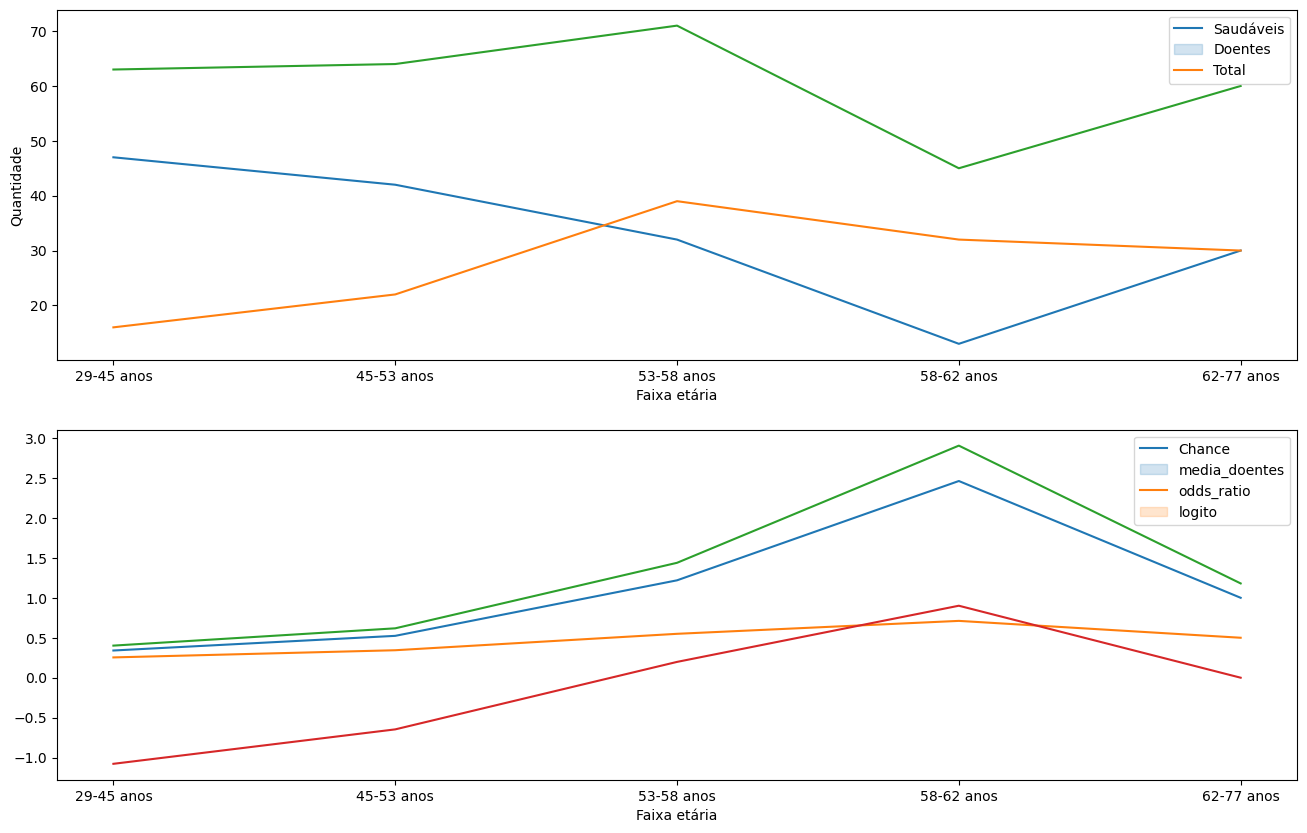

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,10))

age_labels = ['29-45 anos', '45-53 anos', '53-58 anos', '58-62 anos', '62-77 anos']

for col in tab_age.iloc[:-1, :3]:
    sns.lineplot(x=tab_age.iloc[:-1].index.astype(str), 
                 y=tab_age.iloc[:-1][col], 
                 ax=axes[0])
axes[0].legend(labels=['Saudáveis', 'Doentes', 'Total'])
axes[0].set_xlabel(xlabel='Faixa etária')
axes[0].set_ylabel(ylabel='Quantidade')
axes[0].set_xticks(range(len(age_labels)))
axes[0].set_xticklabels(labels=age_labels)

for col in tab_age.iloc[:-1, 3:-1]:
    sns.lineplot(x=tab_age.iloc[:-1].index.astype(str), 
                 y=tab_age.iloc[:-1][col], 
                 ax=axes[1])
axes[1].legend(labels=tab_age.iloc[:-1, 3:-1].columns)
axes[1].set_xlabel(xlabel='Faixa etária')
axes[1].set_ylabel(ylabel='')
axes[1].set_xticks(range(len(age_labels)))
axes[1].set_xticklabels(labels=age_labels)

plt.show()